In [52]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import deepchem as dc

We will use `dc.feat.RDKitDescriptors` to extract 200 chemical properties of molecules. 

# Feature extraction

In [35]:
def extract_rdkit_features(df):
    resuts = df[["MolID", "mol", "Class", "Model", "IC50", "EXP"]]
    
    smiles = df["mol"].to_list()
    featurizer = dc.feat.RDKitDescriptors()
    features = featurizer(smiles)
    cols = featurizer.descriptors
    n_cols = len(cols)
    
    X = []
    for feat, col in zip(features, cols):
        if feat.shape[0] == 0:
            feat = np.array([np.nan] * n_cols)
        X.append(feat)
    
    X = np.array(X)
    for col_data, col in zip(X.T, cols):
        resuts[col] = col_data
    
    return resuts

In [29]:
Sars2_train = pd.read_csv("Sars2_train.csv")
Sars2_train.head()

,MolID,mol,Class,Model,IC50,EXP,MolecularWeight,ExactMass,HeavyAtoms,Rings,...,MolecularVolume,RotatableBonds,HydrogenBondDonors,HydrogenBondAcceptors,SLogP,SMR,TPSA,Fsp3Carbons,Sp3Carbons,MolecularComplexity
0,Triparanol,CC[NH](CCOc1ccc(cc1)[C@](c1ccc(cc1)C)(Cc1ccc(c...,1,Train,7.05,-7.05,440.02,439.2278,31,3,...,428.55,10,2,3,7.25,133.24,38.36,0.33,9,56
1,Tilorone,CC[NH](CCOc1ccc2c(c1)C(=O)c1c2ccc(c1)OCC[NH](C...,1,Train,4.09,-7.38,414.58,414.2882,30,3,...,417.35,12,2,5,7.15,130.24,53.33,0.48,12,55
2,Tideglusib,O=c1sn(c(=O)n1Cc1ccccc1)c1cccc2c1cccc2,1,Train,1.55,-7.95,334.39,334.0776,24,4,...,275.91,3,0,4,5.06,97.44,44.00,0.05,1,62
3,Tetrandrine,COc1c(OC)cc2c3c1Oc1cc4c(cc1OC)CC[NH]([C@H]4Cc1...,1,Train,3.00,-7.56,626.78,626.3356,46,8,...,580.38,4,2,8,8.26,183.10,77.32,0.37,14,60
4,Shikonin,CC(=CC[C@H](C1=CC(=O)c2c(C1=O)c(O)ccc2O)O)C,0,Train,15.75,-6.58,288.30,288.0998,21,2,...,275.21,3,3,5,2.41,77.08,94.83,0.25,4,38


In [39]:
df_rdkit = extract_rdkit_features(Sars2_train)

RDKit ERROR: [12:32:24] Explicit valence for atom # 2 N, 4, is greater than permitted
Failed to featurize datapoint 0, None. Appending empty array
Exception message: Python argument types in
    rdkit.Chem.rdmolfiles.CanonicalRankAtoms(NoneType)
did not match C++ signature:
    CanonicalRankAtoms(RDKit::ROMol mol, bool breakTies=True, bool includeChirality=True, bool includeIsotopes=True)
RDKit ERROR: [12:32:24] Explicit valence for atom # 2 N, 4, is greater than permitted
Failed to featurize datapoint 1, None. Appending empty array
Exception message: Python argument types in
    rdkit.Chem.rdmolfiles.CanonicalRankAtoms(NoneType)
did not match C++ signature:
    CanonicalRankAtoms(RDKit::ROMol mol, bool breakTies=True, bool includeChirality=True, bool includeIsotopes=True)
RDKit ERROR: [12:32:24] Explicit valence for atom # 21 N, 4, is greater than permitted
Failed to featurize datapoint 3, None. Appending empty array
Exception message: Python argument types in
    rdkit.Chem.rdmolfile

In [40]:
df_rdkit.head()

,MolID,mol,Class,Model,IC50,EXP,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,Triparanol,CC[NH](CCOc1ccc(cc1)[C@](c1ccc(cc1)C)(Cc1ccc(c...,1,Train,7.05,-7.05,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Tilorone,CC[NH](CCOc1ccc2c(c1)C(=O)c1c2ccc(c1)OCC[NH](C...,1,Train,4.09,-7.38,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Tideglusib,O=c1sn(c(=O)n1Cc1ccccc1)c1cccc2c1cccc2,1,Train,1.55,-7.95,12.774602,-0.300735,12.774602,0.252975,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Tetrandrine,COc1c(OC)cc2c3c1Oc1cc4c(cc1OC)CC[NH]([C@H]4Cc1...,1,Train,3.00,-7.56,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Shikonin,CC(=CC[C@H](C1=CC(=O)c2c(C1=O)c(O)ccc2O)O)C,0,Train,15.75,-6.58,12.349168,-1.133103,12.349168,0.077870,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
df_rdkit.describe().T

,count,mean,std,min,25%,50%,75%,max
Class,52.0,0.750000,0.437237,0.000000,0.750000,1.000000,1.000000,1.000000
IC50,52.0,15.061731,68.791027,0.040000,1.752500,4.110000,7.520000,500.000000
EXP,52.0,-7.553846,0.999481,-10.130000,-7.882500,-7.375000,-7.012500,-4.520000
MaxEStateIndex,39.0,12.503358,2.367624,4.109066,12.398508,12.930958,13.770219,15.129540
MinEStateIndex,39.0,-1.003774,0.936072,-4.316078,-1.203737,-1.006450,-0.683749,0.920839
...,...,...,...,...,...,...,...,...
fr_thiazole,39.0,0.025641,0.160128,0.000000,0.000000,0.000000,0.000000,1.000000
fr_thiocyan,39.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
fr_thiophene,39.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
fr_unbrch_alkane,39.0,0.205128,0.731958,0.000000,0.000000,0.000000,0.000000,3.000000


In [46]:
# molecules that failed to generate features

isnull = df_rdkit.isnull().any(axis=1)
df_rdkit.loc[isnull, ["MolID", "mol", "Class"]]

,MolID,mol,Class
0,Triparanol,CC[NH](CCOc1ccc(cc1)[C@](c1ccc(cc1)C)(Cc1ccc(c...,1
1,Tilorone,CC[NH](CCOc1ccc2c(c1)C(=O)c1c2ccc(c1)OCC[NH](C...,1
3,Tetrandrine,COc1c(OC)cc2c3c1Oc1cc4c(cc1OC)CC[NH]([C@H]4Cc1...,1
8,Penfluridol,Fc1ccc(cc1)C(c1ccc(cc1)F)CCC[NH]1CCC(CC1)(O)c1...,1
15,Mequitazine,c1ccc2c(c1)N(C[C@@H]1C[N@@H]3CC[C@H]1CC3)c1c(S...,1
16,Mefloquine,O[C@H](c1cc(nc2c1cccc2C(F)(F)F)C(F)(F)F)[C@@H]...,1
21,Loperamide,Clc1ccc(cc1)C1(O)CC[NH](CC1)CCC(C(=O)N(C)C)(c1...,0
25,Gilteritinib,COc1cc(ccc1N1CCC(CC1)[NH]1CCN(CC1)C)Nc1nc(NC2C...,1
26,Fluspirilene,Fc1ccc(cc1)C(c1ccc(cc1)F)CCC[NH]1CCC2(CC1)C(=O...,1
30,Ebastine,O=C(c1ccc(cc1)C(C)(C)C)CCC[NH]1CCC(CC1)OC(c1cc...,1


In [53]:
def plot_hist(df, y_class, ncols=4):
    poss = y_class == 1
    neg = ~poss
    
    var_names = df.columns
    n_vars = len(var_names)
    nrows = int(np.ceil(n_vars / ncols))
    
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*5, nrows*3))
    plt.subplots_adjust(hspace=0.5)
    
    ax = ax.flatten()
    
    for i, var in enumerate(var_names):
        sns.kdeplot(df.loc[poss, var], ax=ax[i], label="Class 1")
        sns.kdeplot(df.loc[neg, var], ax=ax[i], label="Class 0")
        ax[i].legend()

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles wi

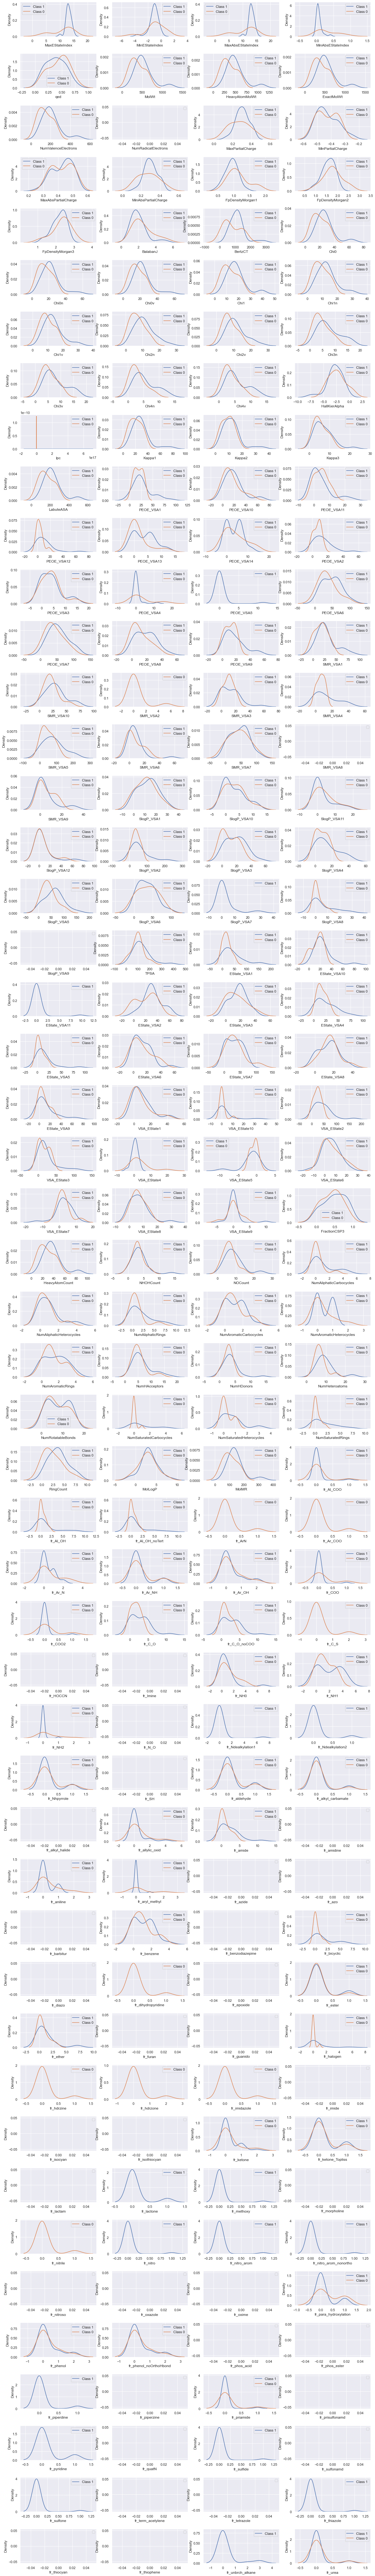

In [54]:
X_train = df_rdkit.drop(["MolID", "mol", "Model", "IC50", "Class", "EXP"], axis="columns")
y_class = df_rdkit["Class"]

plot_hist(X_train, y_class)